In [ ]:
import pandas as pd

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

from sklearn.metrics import roc_auc_score

In [ ]:
icu = pd.read_csv("data/icu_data.csv").iloc[:, 1:]
expired = pd.read_csv("data/expired_data.csv").iloc[:, 1:]

In [ ]:
icu_target = icu.iloc[:, -1]
icu_data = icu.iloc[:, :-1]

In [ ]:
from sklearn.model_selection import train_test_split
icu_data_train, icu_data_test, icu_target_train, icu_target_test, = train_test_split(icu_data, icu_target, test_size=0.1, shuffle=True, random_state=13123)

In [ ]:
# The DNN model used five hidden layers with 6, 8, 16, 8, 4 neurons respectively.
def make_model():
  model = Sequential()
  model.add(Dense(6, activation="relu", input_shape=(5,), kernel_initializer="he_normal", kernel_regularizer="l2"))
  model.add(Dense(8, activation="relu", kernel_initializer="he_normal", kernel_regularizer="l2"))
  model.add(Dense(16, activation="relu", kernel_initializer="he_normal", kernel_regularizer="l2"))
  model.add(Dense(8, activation="relu", kernel_initializer="he_normal", kernel_regularizer="l2"))
  model.add(Dense(4, activation="relu", kernel_initializer="he_normal", kernel_regularizer="l2"))
  # [...] the sigmoid activation function for the output layer, and the “he_normal” normalization scheme were applied.
  model.add(Dense(1, activation="sigmoid", kernel_initializer="he_normal", kernel_regularizer="l2"))
  model.compile(optimizer="adam", loss="mean_squared_error", metrics=["accuracy"])
  return model
icu = make_model()
icu.fit(icu_data_train, icu_target_train, epochs=100, validation_split=0.2, verbose=0)
roc_auc_score(icu_target_test, icu.predict(icu_data_test)[:, 0])

0.7111992945326279

In [ ]:
aucs = []
for i in range(1, 26):
  print(f"Training model #{i}")
  m = make_model()
  tf.random.set_seed(i)
  m.compile(optimizer="adam", loss="mean_squared_error", metrics=["accuracy"])
  m.fit(icu_data_train, icu_target_train, epochs=100, validation_split=0.2, verbose=0)
  roc = roc_auc_score(icu_target_test, m.predict(icu_data_test)[:, 0])
  print(f"ROC AUC: {roc}")
  aucs.append(roc)

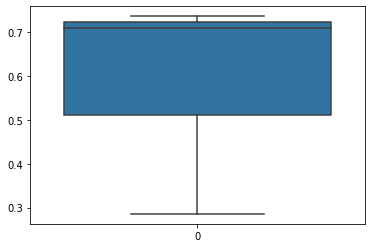

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(data=aucs)
plt.show()